## Project Challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Report_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data analysis and visualisation</u>](#datavis)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Prediction challenge</u>](#prediction)
    - [3.1: <u>The expected revenue (gross)</u>](#gross)
    - [3.2: <u>IMDb score (score)</u>](#score) 
- [Part 4: <u>Exploratory component</u>](#explore)
    - [4.1: <u>How did major economic crisis affect the production and financial revenue of US movies during 1980 to 2020 ?</u>](#q1)
    - [4.2: <u>Q2</u>](#q2)
- [Part 5: <u>Conclusion</u>](#conc)

In [2]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl


%matplotlib inline

---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

When talking about movie productions in the West, US always come up as the center having one of the largest revenue in the motion picture industry. The movies produced in the US has since last century gained wide range of dedicated audience around the world and US customers are also great contributors to many movies' international box office successes, especially with the power of Hollywood. With successful movies comes movie stars, directors, writers, and because of them one attracts more audience to walk into the cinemas and buy more movie tickets. Movie ratings also became an important metric people use to make decisions of whether to watch a movie or not, which in term are often directly linked to the movie's box office success. In this project we aim to predict the successes of movies released in the US from 1980 to 2020 in terms of their expected revenue and IMDb score, as well as exploring into the impact of major economic crisis on financial revenue of motion picture industry in US and how the structure of movie stars network potentially correlates to success of movies.

We will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data) as a starting point. The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. It is note that the original structure of the dataset is not as "comprehensive" as it claims by the title, therefore we have reconstructed the dataset into a new format that will be more efficient to use for the purpose of our investigation. The main goal of restructuring the dataset is to have unique movies as observations/rows and provide more effective overview of various attributes describing each movie. The detailed cleaning and data augmentation process can be seen in the appendix. Below is the features table that are included in the preprocessed dataset. 

| Feature        | Description                                                                         | Type                 |
|----------------|-------------------------------------------------------------------------------------|----------------------|
| title_year     | Combination of title of the movie and the year the movie was released               | Discrete -> nominal  |
| title          | Title of the movie                                                                  | Discrete -> nominal  |
| rating         | MPAA (Motion Picture Association of America film rating) of the movie               | Discrete -> nominal  |
| region         | Region of release of the movie                                                      | Discrete -> nominal  |
| released       | Release date of the movie                                                           | Discrete -> interval |
| year           | Year of the movie release                                                           | Discrete -> interval |
| month          | Month of the movie release                                                          | Discrete -> ordinal  |
| day            | Day of the movie release                                                            | Discrete -> interval |
| score          | IMDb score of the movie                                                             | Continuous -> ratio  |
| director       | List of directors of the movie                                                      | Discrete -> nominal  |
| writer         | List of writers of the movie                                                        | Discrete -> nominal  |
| star           | List of stars (main actor/actress) of the movie                                     | Discrete -> nominal  |
| country        | List of country of the production of the movie                                      | Discrete -> nominal  |
| budget         | Budget of the movie in $1mm                                                         | Continuous -> ratio  |
| gross          | Gross of the movie in $1mm                                                          | Continuous -> ratio  |
| company        | Production company of the movie                                                     | Discrete -> nominal  |
| runtime        | Runtime of the movie in minutes                                                     | Continuous -> ratio  |
| primaryName    | List of name of people who worked on the movie                                      | Discrete -> nominal  |
| category       | Dictionary of type of credit/role the persons in primaryNames had for the movie     | Discrete -> nominal  |
| nconst         | Dictionary of person ID in IMDb's relational database for names in primaryNames     | Discrete -> nominal  |
| knownForTitles | Dictionary of primaryNames mapped to the list of movie title IDs they are known for | Discrete -> nominal  |
| Profit         | Profit of the movie (Gross-Budget) in $1mm                                          | Continuous -> ratio  |
| released_2     | Release year and month of the movie                                                 | Discrete -> interval |
| continent      | Continent of where the movie is produced                                            | Discrete -> nominal  |
| duration       | Duration of the movie defined as (Long, Short)                                      | Discrete -> ordinal  |

---
<a id='datavis'></a>
## Part 2: _<u>Data analysis and visualisation</u>_

---
<a id='prediction'></a>
## Part 3: _<u>Prediction challenge</u>_

<a id='gross'></a>
### 3.1: _<u>The expected revenue (gross)</u>_

<a id='score'></a>
### 3.2: _<u>IMDb score (score)</u>_

In [6]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')
df_movies.to_csv('df_movies.csv', index = False)

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


In [207]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
train = pd.read_csv('df_movies.csv') #Load the dataframe to save time 
train['released'] = pd.to_datetime(train['released'],format='%Y-%m-%d')
cal = calendar()
holidays = cal.holidays(start=train.released.min(), end=train.released.max())
train['Holiday'] = train['released'].isin(holidays).astype(int)

In [208]:
# Devide the socre into three category: low, medium, and high
low =np.percentile(train['score'], 10)
high = np.percentile(train['score'], 90)
train.loc[train['score'] <= low,'score'] = 1 
train.loc[(train['score'] > low) & (train['score'] < high),'score']  = 2
train.loc[train['score'] >= high, 'score']  = 3
train['score'] = train['score'].astype(int)

# Finding and one hot encode the features with the top 15 most common
train = binary_features(train, ['director','writer','star','company', 'rating','genre','month','country','duration','continent'], 10)


### SKlearn

In [122]:
from sklearn.utils import shuffle
X = shuffle(train)

## define features to use 
target = X['score']

features = X[X.columns[~X.columns.isin(['title_year','titleId','title','primaryName','category','region',
'released','released_2','day','score','nconst','knownForTitles','continent','year'])]]

x_train, x_test, y_train, y_test = split_stand(features, target)

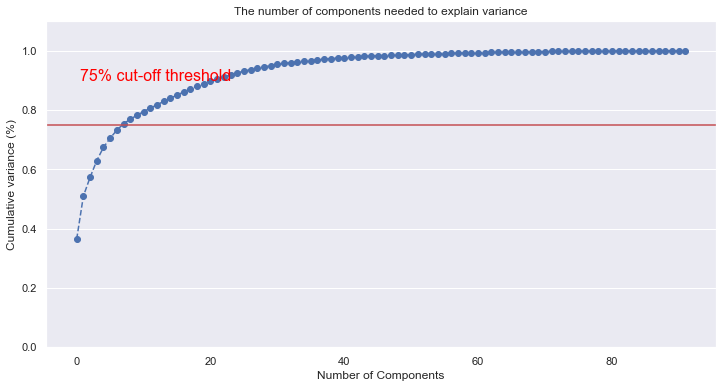

In [123]:
## PCA
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit(x_train)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(range(len(y)), y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.75, color='r', linestyle='-')
plt.text(0.5, 0.90, '75% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [124]:
np.where(y >= 0.75)[0][0]

7

In [125]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=8)
x_train_trans = sklearn_pca.fit_transform(x_train)
x_test_trans = sklearn_pca.fit_transform(x_test)

In [126]:
df_eval, model = optimal_model(x_train_trans, y_train, x_test_trans, y_test)
df_eval

,4,3,2,0,5,1,6
Model,Naive Bayes,Random Forest,Logistic Regression,Support Vector Machines,Perceptron,KNN,Decision Tree
f1_score,0.728244,0.70998,0.700536,0.698497,0.67881,0.659489,0.643944


In [127]:
model_reflection(model, x_test_trans, y_test, features, target)

Confusion matrix:
[[ 20 114   2]
 [ 36 942  43]
 [  1 120  48]]
              precision    recall  f1-score   support

         low       0.35      0.15      0.21       136
      medium       0.80      0.92      0.86      1021
        high       0.52      0.28      0.37       169

    accuracy                           0.76      1326
   macro avg       0.56      0.45      0.48      1326
weighted avg       0.72      0.76      0.73      1326

The average f1-score is 0.709 for 100 runs.


### ANN

In [202]:
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


#### Examine class label imbalance

In [209]:
_, low, medium, high = np.bincount(train['score'])
total =low + medium + high
print('Examples:\n    Total: {}\n    low: {} ({:.2f}% of total)\n  medium: {} ({:.2f}% of total)\n high: {} ({:.2f}% of total)\n'.format(
    total, low, 100 * low / total, medium, 100 * medium / total, high, 100 * high / total))

Examples:
    Total: 5304
    low: 565 (10.65% of total)
  medium: 4090 (77.11% of total)
 high: 649 (12.24% of total)



#### Clean, split and normalize the data

In [304]:
## define features to use 
X= train[train.columns[~train.columns.isin(['title_year','titleId','title','primaryName','category','region',
'released','released_2','day','score','nconst','knownForTitles','continent','year'])]]
## define target variable 
Y = train.score.values

# Use a utility from sklearn to split and shuffle your dataset.
X_train, X_test, y_train, y_test = train_test_split(shuffle(X), Y, test_size=0.25)
X_train, X_val, y_train, y_val  = train_test_split(shuffle(X_train), y_train, test_size=0.25)
# Create categorical labels

train_labels = to_categorical(y_train)[:,1:]
test_labels = to_categorical(y_test)[:,1:]
val_labels = to_categorical(y_val)[:,1:]

## Standarization 
x_mean = X_train.iloc[:,0:4].mean()
x_std = X_train.iloc[:,0:4].std()

X_train.iloc[:,0:4] = (X_train.iloc[:,0:4] - x_mean) / x_std
X_test.iloc[:,0:4] = (X_test.iloc[:,0:4] - x_mean) / x_std
X_val.iloc[:,0:4] = (X_val.iloc[:,0:4] - x_mean) / x_std

In [305]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (2983, 3)
Validation labels shape: (995, 3)
Test labels shape: (1326, 3)
Training features shape: (2983, 92)
Validation features shape: (995, 92)
Test features shape: (1326, 92)


#### Define model and metrics 

In [367]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(3, activation='softmax',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-4),
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=metrics)

  return model

In [383]:
EPOCHS = 50
BATCH_SIZE = 128

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [384]:
model = make_model()
model.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 128)               11904     
                                                                 
 dropout_125 (Dropout)       (None, 128)               0         
                                                                 
 dense_213 (Dense)           (None, 64)                8256      
                                                                 
 dropout_126 (Dropout)       (None, 64)                0         
                                                                 
 dense_214 (Dense)           (None, 32)                2080      
                                                                 
 dropout_127 (Dropout)       (None, 32)                0         
                                                                 
 dense_215 (Dense)           (None, 3)               

In [385]:
model.predict(X_train[:5])

array([[0.58383685, 0.2097712 , 0.20639195],
       [0.64849496, 0.18631008, 0.16519497],
       [0.6746142 , 0.17970018, 0.14568566],
       [0.6818085 , 0.18550923, 0.13268226],
       [0.5821675 , 0.20034084, 0.21749166]], dtype=float32)

In [386]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

#### Train the model

In [387]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, val_labels))

Epoch 1/50
24/24 [==============================] - 2s 25ms/step - loss: 1.7015 - tp: 1041.0000 - fp: 2340.0000 - tn: 5616.0000 - fn: 2937.0000 - accuracy: 0.2886 - precision: 0.3079 - recall: 0.2617 - auc: 0.4551 - prc: 0.3156 - val_loss: 1.4241 - val_tp: 96.0000 - val_fp: 850.0000 - val_tn: 1140.0000 - val_fn: 899.0000 - val_accuracy: 0.1045 - val_precision: 0.1015 - val_recall: 0.0965 - val_auc: 0.3304 - val_prc: 0.2446
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 1.5082 - tp: 261.0000 - fp: 1800.0000 - tn: 4166.0000 - fn: 2722.0000 - accuracy: 0.1512 - precision: 0.1266 - recall: 0.0875 - auc: 0.3232 - prc: 0.2439 - val_loss: 1.3136 - val_tp: 85.0000 - val_fp: 676.0000 - val_tn: 1314.0000 - val_fn: 910.0000 - val_accuracy: 0.1166 - val_precision: 0.1117 - val_recall: 0.0854 - val_auc: 0.4257 - val_prc: 0.2737
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 1.4069 - tp: 248.0000 - fp: 1564.0000 - tn: 4402.0000 - fn: 2735.0000 - accu

#### Check training history

In [388]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

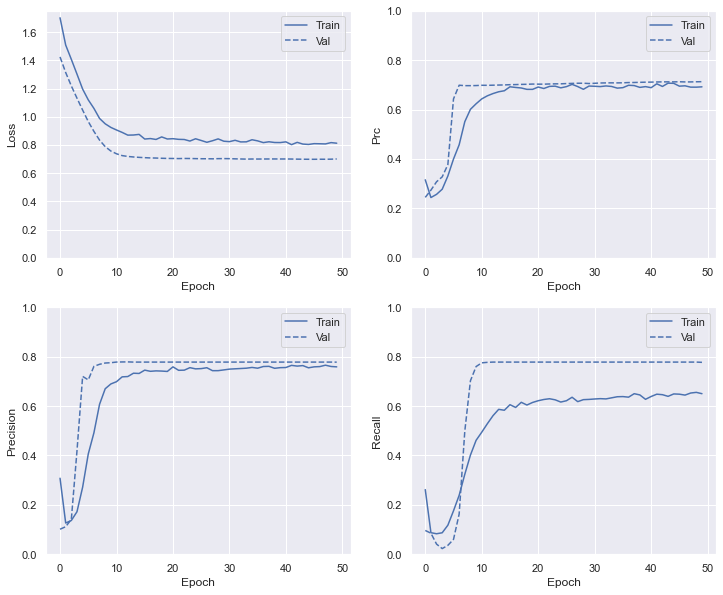

In [389]:
plot_metrics(baseline_history)

---
<a id='explore'></a>
## Part 4: _<u>Exploratory component</u>_

<a id='q1'></a>
### 4.1: _<u>How did major economic crisis affect the production and financial revenue of US movies during 1980 to 2020 ?</u>_

In this section we would like to investigate whether major world economic crisis have had impact on the success of US movies with focus on particularly two factors: **volume of production** and **profit**. We have selected a list of timestamps of interest that could have played role in the progression of US movie industry: 

* **1980-1982**: Early 1980s recession. High unemployement rate and inflation.
* **1990-1991**: Early 1990s recession. 
* **2000-2002**: Early 2000s recession. 
* **2007-2009**: Late 2000s recession, including the infamous 2008 world economic crisis.
* **2020**: Covid-19 pandemic.

In [19]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


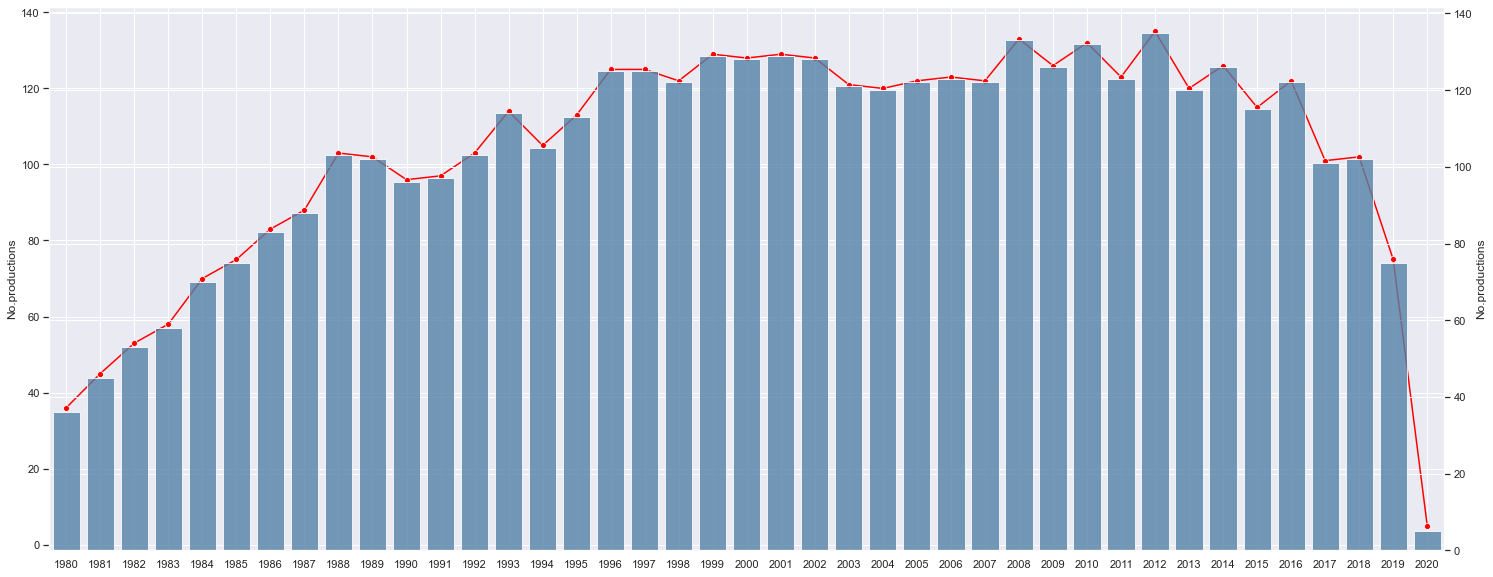

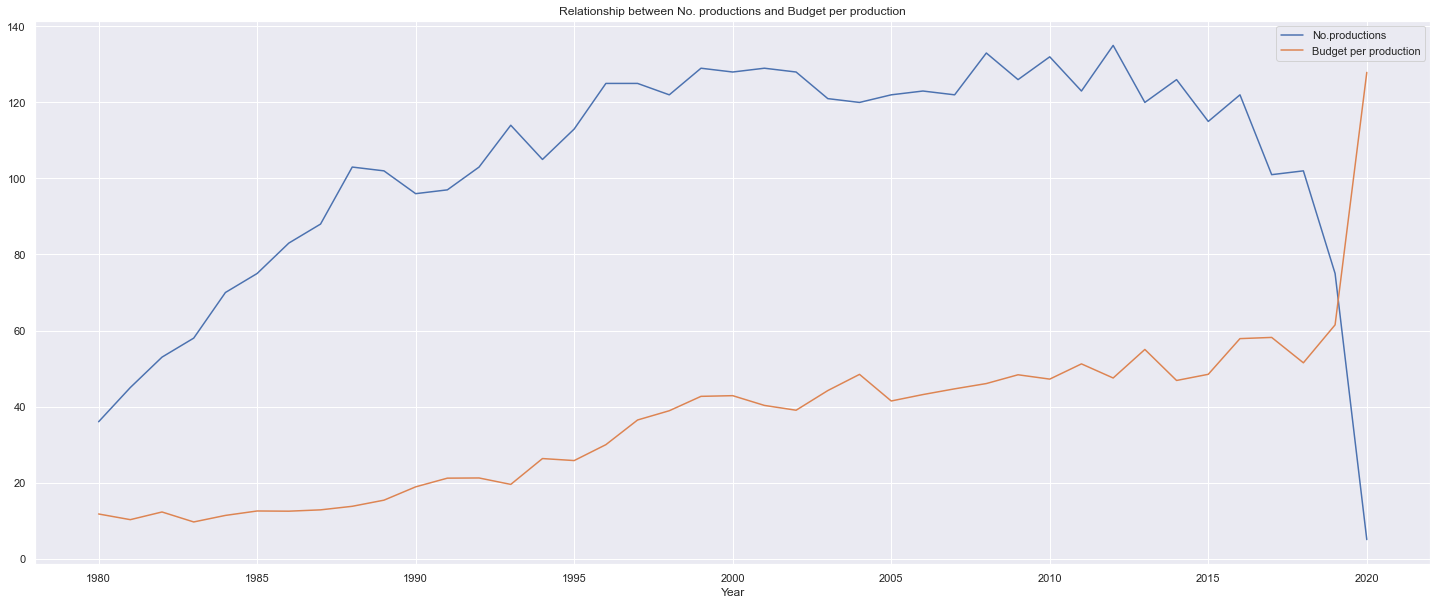

In [36]:
productions(df_movies[df_movies['country'] == 'United States'])

From the first plot above it is not surprising that we see the clear dive in the number of movies produced in 2020, even less than 1980, though it is to note that the data we have only continues until september 2020. This is very much likely caused by the extensive restriction including nationwide lock downs that basically halted physical contacts between people, especially at movie production sites and theatres where lots of people tend to gather. It is even more apparent in the plot showing budget per production where 2020 is the only year that budget spent per production shot up, but much fewer movies were actually produced compared to the previous years. This correpsonds well to the fact that movie production during a pandemic becomes significanly more costly largely due to the intense and meticulous safety measures that need to be conducted on site. (source: https://variety.com/2020/film/news/film-sets-hollywood-pandemic-1234826994/)

And the line plot gets relatively flat around 1990 to 1991, 1999 to 2000 and a sharp downturn from 2005 to 2007. Interestingly, from 1980 to 1982 and 2007 to 2009, supposedly the two of the most severe recession period US experienced, we see increases in movie productions. 


It is however unclear with the simple illustration of volume of production over the years to see the impact of the other timestamps of interest. It could very well be that more movies were produced with lower budget to combat the high unemployement rate, or it could be that ticket prices dropped and more people turned to entertainment as a form of emotional outlet etc. Therefore we will dive deeper into the box office success, hence movie profits during those times. It is to note that value of currency does not stay constant over time, thus the profit, gross and budget values are adjusted for inflation rates using additional data of the US CPI (Customer Product Index) for the period 1980-2020.

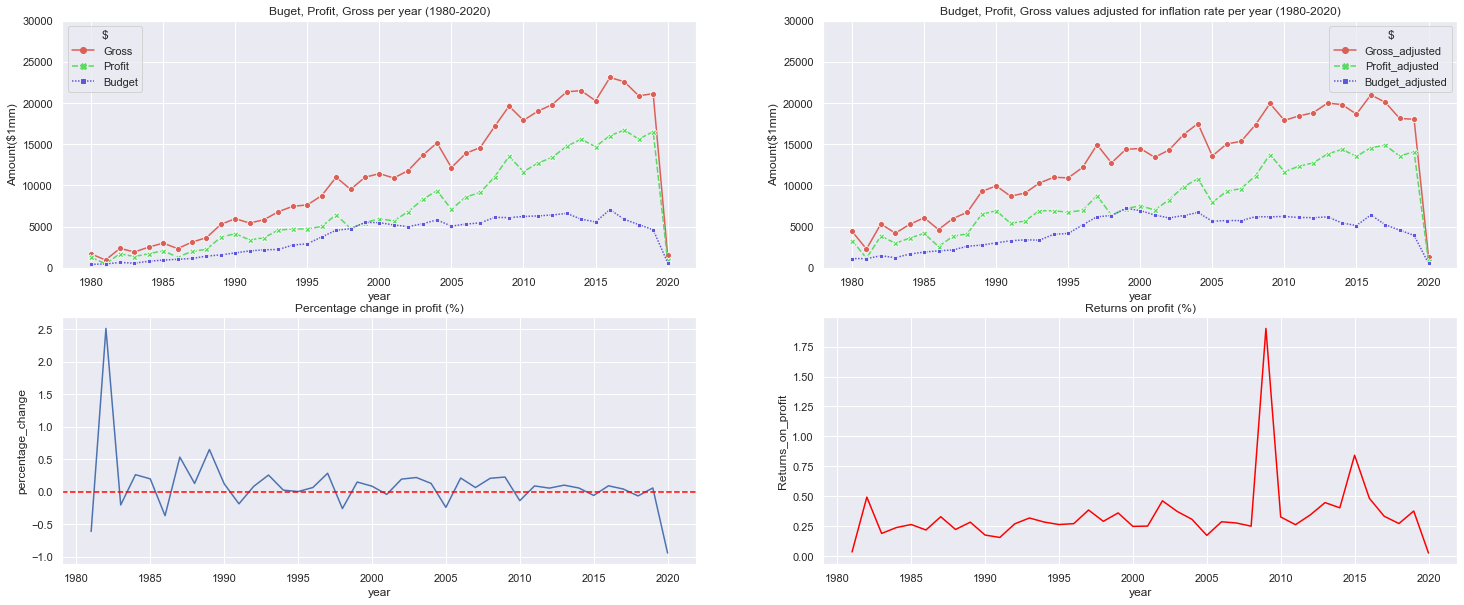

In [37]:
success_visualise(df_movies[df_movies['country'] == 'United States'],'cpi.csv','cpi2.csv')

From the top right plot we can see dips in profit at year 1981, 1991, 2000 and very drastically at year 2020, which corresponds well to the phases of recessions. This is also reflected in the percentage change in profit plot at bottomleft, where the values are negative or close to zero for these years. And we can also see from the bottom right that nearing the end of or 1 to 2 years immediately after the recession periods there tend to be a sharp in crease in return on profits. The time period 2007 to 2009 is especially intrigueing as it didn't follow similar pattern of other recessison periods. We can observe that the profit increased from 2007 to 2009, the percentage change in profit stayed positive during the period, and the return of profits shot up from 2008 to 2009 to all time high between 1980 to 2020. Hence we will further investigate into that period.

,title_year,profit,genre,contribution to profit of the year (%)
3791,Avatar_2009,2610.246203,Action,19.288638
3541,The Dark Knight_2008,820.973645,Action,7.436415
3714,Ice Age: Dawn of the Dinosaurs_2009,796.686817,Animation,5.887186
3775,The Twilight Saga: New Moon_2009,661.025481,Adventure,4.884704
3364,Shrek the Third_2007,653.367380,Animation,7.141745
3361,Spider-Man 3_2007,636.983373,Action,6.962656
3711,Transformers: Revenge of the Fallen_2009,636.303693,Action,4.702021
3523,Indiana Jones and the Kingdom of the Crystal Skull_2008,605.653942,Action,5.486040
3774,2012_2009,591.217826,Action,4.368855
3701,Up_2009,560.099102,Animation,4.138900


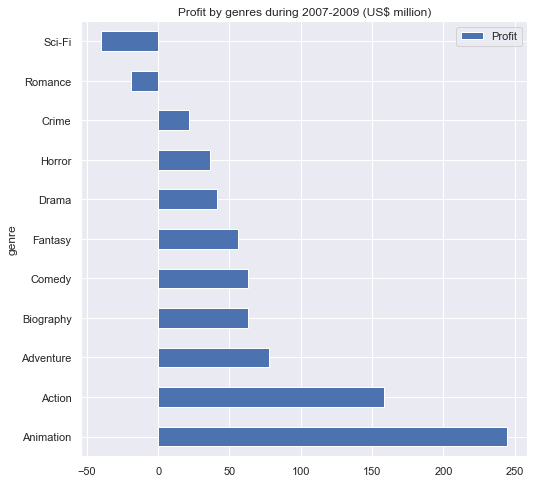

In [38]:
profit_spike(df_movies[df_movies['country'] == 'United States'])

Looking at which movies are released during 2009 we see that Avatar alone contributed to about 20% of the profit that year and it is the movie that brought the greatest amount of profit over the whole period of 1980 to 2020. This could an important factor that led the observation of spike in return on profit at 2009. Cross referencing with news from the period of great recession, we find that US movie industry surged with box office success compared to the previous two decades. Explanations of the phenomenom included that people were going to movie theatres as a form of escapism from the harsh reality. And the fact that they needed content that "don't make you think too much" perfectly coincides with the illustration that shows Animation and Action movies contributed significantly more than any other genres to the movie profits during the period. 

source: https://www.nytimes.com/2009/03/01/movies/01films.html

<a id='q2'></a>
### 4.2: _<u>How does the underlying structure of movie stars network correlates to the successes of movies?</u>_

---
<a id='conc'></a>
## Part 5: _<u>Conclusion</u>_

# Appendix

## Preprocess function

In [5]:
def preprocess(path):
    df = pd.read_csv(path)

    ## create unique identifier of each movie 
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    ## create profit column
    df['Profit'] = df['gross'] - df['budget']

    #########################################################################################
    ## create new compact datarfame
    ## extract list of unique movie titles 
    #titles=list(set(df['title']))
    title_year_set = list(set(df['title_year']))

    # Create a dataframe where each row is a unique movie 
    movies={}
    for t in title_year_set:
        # Create a temperary datframe for subset of with title_year = t
        df_temp = df[df.title_year == t]

        # Extracting all the unique values for the attributes for the given title_year t
        star = np.unique(df_temp['star'])
        writer = np.unique(df_temp['writer'])
        director = np.unique(df_temp['director'])
        title = np.unique(df_temp['title'])
        rating = np.unique(df_temp['rating'])
        genre =np.unique(df_temp['genre'])
        released = np.unique(df_temp['released'])
        year = np.unique(df_temp['year'])
        month = np.unique(df_temp['month'])
        day = np.unique(df_temp['day'])
        score = np.unique(df_temp['score'])
        country = np.unique(df_temp['country'])
        budget = np.unique(df_temp['budget'])
        gross = np.unique(df_temp['gross'])
        company = np.unique(df_temp['company'])
        runtime = np.unique(df_temp['runtime'])
        region = np.unique(df_temp['region'])
        titleId = np.unique(df_temp['titleId'])
        primaryName = np.unique(df_temp['primaryName'])

        # Extract attributes which are based on primaryName and then as dictionaries
        cat = {}
        ncon = {}
        known = {}
        for _, row in df[df.title_year == t].iterrows():
            pN = row['primaryName']
            cat[pN] = row['category']
            ncon[pN] = row['nconst']
            known[pN] = row['knownForTitles']

        movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
        'month':month, 'day':day, 'score':score, 'director':director, 'writer':writer, 'star':star, 'country':country,
        'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName, 'category':cat, 'nconst':ncon, 'knownForTitles':known}
        movies[t]=movie
    
    # Construct dataframe 
    d=pd.DataFrame(movies)
    df2=d.transpose()

    df_movies = df2.copy()
    # Finding one value for budget for each title_year
    df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else [np.nanmean(x)])

    # Unpack array
    col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
        'day', 'score', 'country', 'budget', 'gross', 'director', 'writer', 'star',
        'company', 'runtime']

    for col in col_unpack:
        df_movies[col] = [i[0] for i in df_movies[col]]

    #############################################################################
    ## Data cleaning

    # Drop missing values in budget
    df_movies = df_movies.dropna(subset=['budget'])
    # Dealing with missing values in rating
    df_movies['rating'].fillna("Not Rated", inplace = True) 
    df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
    df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
    'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

    df_movies = df_movies.dropna(subset=['month'])

    df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
    df_movies = df_movies.sort_values(by= ['released'])

    # Chagne type of month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

    # Convert the gross and budget from $ to Million $ 
    df_movies['gross'] = df_movies['gross']/1000000
    df_movies['budget'] = df_movies['budget']/1000000

    df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

    ####################################################################################
    ## add new features to df_movies

    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']

    ## we will create new column called released_2 that only consists of year and month information of movie release
    df_movies['released_2'] = df_movies['year'].astype(str) + '_' + df_movies['month'].astype(str)

    ## drop titleId as it is not a useful identifier for the movies 
    df_movies.drop(columns = 'titleId',inplace = True)

    df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
    df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
    df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

    df_movies['continent'] = df_movies['country'].apply(country_to_continent)

    # Create duration column
    df_movies['duration'] = df_movies['runtime'].apply(duration)

    return df,df_movies


In [6]:
from collections import Counter

# Define function for binarization of columns with the top N most commen ones
def binary_features(train, features, N):
    for feature in features:
# Extract information and convert to list 
        if feature == 'primaryName':
            train[feature]= train[feature].apply(lambda x:[g for g in x])
        else:   
            train[feature]= train[feature].apply(lambda x:[x or []])

        # Finding top 30 most commen
        c = Counter(sum(train[feature], []))
        N_new = len(c)
        most_N = [x[0] for x in c.most_common(N)]

        # Removing the ones that are not in the top 30
        train['temp_N'] = train[feature].apply(lambda x: list(set(most_N) & set(x)))

        # Creat dummies
        dummies = pd.get_dummies(train['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
  
        # Join back with the original dataframe
        train = train.join(dummies)
        train.iloc[:,-N_new:] = train.iloc[:,-N_new:].fillna(0)

        # Drop the temperary colum
        train.drop(columns=['temp_N'], inplace=True)

        train.drop(columns=[feature], inplace=True)
    return train

## Helper functions

In [7]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    

## Q1 functions

In [8]:
def productions(df_movies):
    temp = df_movies.groupby(['year']).count().rename(columns = {'duration':'No.productions'}).reset_index()
    fig, ax1 = plt.subplots(figsize=(25,10))
    sns.lineplot(data = temp['No.productions'], marker='o', color = '#FF0000',sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sns.barplot(data = temp, x='year', y='No.productions', alpha=0.8, color = '#4682B4', ax=ax2)
    plt.show()
    temp2 = df_movies.groupby(['year']).sum().reset_index()
    budget_production_ratio = temp2.budget/temp.runtime
    d = {'year': temp.year, 'No.productions': temp.title,'Budget':temp2.budget, 'Budget_per_production': budget_production_ratio}
    df_new = pd.DataFrame(d)
    plt.subplots(figsize=(25,10))
    plt.plot(df_new['year'], df_new['No.productions'], label = "No.productions")
    plt.plot(df_new['year'], df_new['Budget_per_production'], label = "Budget per production")
    plt.xlabel('Year')
    plt.ylabel('')
    plt.title('Relationship between No. productions and Budget per production')
    plt.legend()
    plt.show()

In [9]:
def success_visualise(df_movies,inflation,cpi):

    profit = df_movies.loc[:,['year','Profit']].rename(columns = {'Profit':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Profit']*41}))
    gross = df_movies.loc[:,['year','gross']].rename(columns = {'gross':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Gross']*41}))
    budget = df_movies.loc[:,['year','budget']].rename(columns = {'budget':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Budget']*41}))
    temp2 = pd.concat([gross,profit,budget]).reset_index()

    ## get inflation rate from Comsumer Product Index data for US
    df_cpi = pd.read_csv(inflation,skiprows=3)
    inflation_rate = df_cpi[df_cpi['Country Name'] == 'United States'].T.iloc[24:,].reset_index().rename(columns = {251:'Inflation','index':'year'})
    df_cpi_2= pd.read_csv(cpi,skiprows=3)
    ## cpi base year 2010
    cpi = df_cpi_2[df_cpi_2['Country Name'] == 'United States'].T.iloc[24:,].reset_index().rename(columns = {251:'CPI','index':'year'})
    inf_cpi = inflation_rate.merge(cpi,on='year')

    profit2 = profit.groupby(['year']).sum().reset_index()
    profit2['percentage_change'] = profit2.value.pct_change()
    ## adjust profit for inflation rate using 2010 as base year 
    profit2['profit_adjusted'] = (profit2.value/inf_cpi.CPI.iloc[:-1,])*100
    ## caculate returns in profits / earnings 
    profit2['Returns_on_profit'] = (1+profit2['percentage_change'].iloc[1:,])/(1+inflation_rate.iloc[1:-1,].Inflation)

    ## adjust gross values for inflation rate using 2010 as base year
    gross2 = gross.groupby(['year']).sum().reset_index()
    gross2['gross_adjusted'] = (gross2.value/inf_cpi.CPI.iloc[:-1,])*100

    ## Adjust for budget values for inflation rate using 2010 as base year 
    budget2 = budget.groupby(['year']).sum().reset_index()
    budget2['budget_adjusted'] = (budget2.value/inf_cpi.CPI.iloc[:-1,])*100

    P = profit2.join(pd.DataFrame({'$':['Profit_adjusted']*len(profit2)})).rename(columns = {'profit_adjusted':'Amount($1mm)'})
    G = gross2.join(pd.DataFrame({'$':['Gross_adjusted']*len(gross2)})).rename(columns = {'gross_adjusted':'Amount($1mm)'})
    B = budget2.join(pd.DataFrame({'$':['Budget_adjusted']*len(budget2)})).rename(columns = {'budget_adjusted':'Amount($1mm)'})

    temp3 = pd.concat([G,P,B]).reset_index()
    temp3[['Amount($1mm)','Returns_in_profit']] = temp3[['Amount($1mm)','Returns_on_profit']].apply(pd.to_numeric, errors='coerce', axis=1)

    temp2 = temp2.rename(columns={'value':'Amount($1mm)'})

    fig, ax =plt.subplots(2,2,figsize=(25,10))

    palette = sns.color_palette("hls", 3)

    ax[0,0].set(ylim=(0, 30000))
    sns.lineplot(
        data=temp2,
        x="year", y='Amount($1mm)', hue="$", style = '$',
        markers = True, palette=palette,ax=ax[0,0]
    ).set_title('Buget, Profit, Gross per year (1980-2020)')
    ax[0,1].set(ylim=(0, 30000))
    sns.lineplot(
        data=temp3,
        x="year", y='Amount($1mm)', hue="$", style = '$',
        markers = True, palette=palette,ax=ax[0,1]
    ).set_title('Budget, Profit, Gross values adjusted for inflation rate per year (1980-2020)')


    sns.lineplot(
        data=profit2,
        x="year", y='percentage_change',
        markers = True, palette=palette,ax = ax[1,0]
    ).set_title('Percentage change in profit (%)')
    ax[1,0].axhline(0, ls='--',color = 'red')

    sns.lineplot(
        data=profit2,
        x="year", y='Returns_on_profit',
        markers = True, color = 'red',ax = ax[1,1]
    ).set_title('Returns on profit (%)')

    # profit = df_movies.loc[:,['year','Profit']].rename(columns = {'Profit':'value'}).join(pd.DataFrame({'type':['Profit']*len(df_movies)}))
    # gross = df_movies.loc[:,['year','gross']].rename(columns = {'gross':'value'}).join(pd.DataFrame({'type':['Gross']*len(df_movies)}))
    # budget = df_movies.loc[:,['year','budget']].rename(columns = {'budget':'value'}).join(pd.DataFrame({'type':['Budget']*len(df_movies)}))
    # temp2 = pd.concat([gross,profit,budget]).reset_index()
    # palette = sns.color_palette("hls", 3)
    # sns.lineplot(
    #     data=temp2,
    #     x="year", y="value", hue="type", style = 'type',
    #     markers = True, palette=palette
    # )

In [10]:
from IPython.display import display, HTML
def profit_spike(df_movies):
    movie_2007_2009 = df_movies[df_movies['year'].isin([2007,2008,2009])]
    movie_2007_2009.loc[movie_2007_2009['year'] == 2007,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2007].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2007].Profit))*100
    movie_2007_2009.loc[movie_2007_2009['year'] == 2008,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2008].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2008].Profit))*100
    movie_2007_2009.loc[movie_2007_2009['year'] == 2009,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2009].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2009].Profit))*100
    display(HTML(movie_2007_2009[['title_year','Profit','genre','Percent_contribute_profit']].sort_values(by = 'Profit', ascending  = False).head(10).rename(columns = {
        'Profit':'profit','Percent_contribute_profit':'contribution to profit of the year (%)'
    }).to_html()))

    df31 = movie_2007_2009[['title', 'Profit','genre']]
    df41 = movie_2007_2009.groupby(['genre']).mean()
    df41.sort_values('Profit', ascending=False, inplace = True )
    df41[['Profit']].plot.barh(stacked=True, title = 'Profit by genres during 2007-2009 (US$ million)', figsize=(8, 8))
    plt.show()

## Prediction (Score) code

In [48]:
def split_stand(features, target):
    ## Splitting the data
    x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.25)

    ## Standarization 
    x_mean = x_train.iloc[:,0:4].mean()
    x_std = x_train.iloc[:,0:4].std()

    x_train.iloc[:,0:4] = (x_train.iloc[:,0:4] - x_mean) / x_std
    x_test.iloc[:,0:4] = (x_test.iloc[:,0:4] - x_mean) / x_std

    return x_train, x_test, y_train, y_test

In [12]:
def test_optimal(model1, f1_1, model2, f1_2):
    if f1_1 < f1_2:
        return f1_2, model2
    else: 
        return f1_1, model1

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

def optimal_model(x_train, y_train, x_test, y_test):
    # Support Vector Machines
    svc = SVC()
    svc.fit(x_train, y_train)
    ypred_svc = svc.predict(x_test)
    svc_f1 = f1_score(y_test, ypred_svc, average='weighted')
    #print(confusion_matrix(y_test, ypred_svc))
    model = svc

    # Perceptron
    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)
    ypred_per = perceptron.predict(x_test)
    per_f1 = f1_score(y_test, ypred_per, average='weighted')
    #print(confusion_matrix(y_test, ypred_per))
    f1, model = test_optimal(svc, svc_f1, perceptron, per_f1)

    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(x_train, y_train)
    ypred_rf = random_forest.predict(x_test)
    rf_f1 = f1_score(y_test, ypred_rf, average='weighted')
    #print(confusion_matrix(y_test, ypred_rf))
    f1, model = test_optimal(model, f1, random_forest, rf_f1)

    # Decision Tree
    DT=DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    ypred_DT = DT.predict(x_test)
    DT_f1 = f1_score(y_test, ypred_DT, average='weighted')
    #print(confusion_matrix(y_test, ypred_DT))
    f1, model = test_optimal(model, f1, DT, DT_f1)

    # K Nearest Neighbor
    knearest = KNeighborsClassifier(n_neighbors=2)
    knearest.fit(x_train, y_train)
    ypred_KNN = knearest.predict(x_test)
    KNN_f1 = f1_score(y_test, ypred_KNN, average='weighted')
    #print(confusion_matrix(y_test, ypred_KNN))
    f1, model = test_optimal(model, f1, knearest, KNN_f1)

    # Gaussian Naive Bayes
    gaussian = GaussianNB()
    gaussian.fit(x_train, y_train)
    ypred_g = gaussian.predict(x_test)
    g_f1 = f1_score(y_test, ypred_g, average='weighted')
    #print(confusion_matrix(y_test, ypred_g))
    f1, model = test_optimal(model, f1, gaussian, g_f1)

    # Logistic Regression
    LogReg = LogisticRegression(solver='liblinear')
    LogReg.fit(x_train, y_train)
    ypred_LogReg = LogReg.predict(x_test)
    LogReg_f1 = f1_score(y_test, ypred_LogReg, average='weighted')
    #print(confusion_matrix(y_test, ypred_LogReg))
    f1, model = test_optimal(model, f1, LogReg, LogReg_f1)
    
    # Reflection on the models' f1-score
    models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
        'f1_score': [svc_f1, KNN_f1, LogReg_f1, 
                rf_f1, g_f1, per_f1, DT_f1]})
    models = models.sort_values(by='f1_score', ascending=False).T
    return models, model


In [14]:
# Model reflection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import statistics

def model_reflection(model, x_test, y_test, X, target):
    y_pred = model.predict(x_test)
    #print('Classification accuracy: %.2f'% accuracy_score(y_test, y_pred))
    #print('F1 score: %.2f' % f1_score(y_test, y_pred, average='weighted'))
    print(f'Confusion matrix:\n{confusion_matrix(y_test,y_pred)}')
    #ncm = confusion_matrix(y_test, y_pred, normalize='true',  labels=[1,0])
    #print('Normalized Confusion matrix (Decision Tree Classifier): \n', ncm)
    #print(f'The sensitivity is {round(ncm[0][0],3)} and specificity is {round(ncm[1][1],3)} for our classifier.')
    print(classification_report(y_test, y_pred, target_names=['low','medium','high']))

    # run for 100 turns to find the average sensitivity and specificity
    #import statistics
    #sens = []
    #speci = []
    f1_list = []
    n = 100
    for i in range(n):
        x_train, x_test, y_train, y_test = split_stand(X, target)

        ## PCA 
        sklearn_pca = sklearnPCA(n_components=17)
        x_train_trans = sklearn_pca.fit_transform(x_train)
        x_test_trans = sklearn_pca.fit_transform(x_test)
        model.fit(x_train_trans, y_train)
        
        ypred = model.predict(x_test_trans)
        precision,recall,fscore,support=score(y_test,ypred,average='weighted')
        f1_list.append(fscore)
    print(f"The average f1-score is {round(statistics.mean(f1_list),3)} for {n} runs.")